In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Global settings for MatPlotlib
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
plt.rcParams["axes.labelpad"]='10'

# Use the same Font as LaTeX
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.formatter.use_mathtext"] = True

In [3]:
data_linear_system_lqr = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/LinearSystem/LQR/episodic_returns.parquet.gz"
data_linear_system_skvi = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/LinearSystem/SKVI/episodic_returns.parquet.gz"
data_linear_system_sac_q = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/LinearSystem/SAC_Q/episodic_returns.parquet.gz"
data_linear_system_sac_v = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/LinearSystem/SAC_V/episodic_returns.parquet.gz"
data_linear_system_sakc = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/LinearSystem/SAKC/episodic_returns.parquet.gz"

In [4]:
# Loading in the dataframes for the Linear System
lqr_linear_system_df = pd.read_parquet(data_linear_system_lqr)
skvi_linear_system_df = pd.read_parquet(data_linear_system_skvi)
sac_q_linear_system_df = pd.read_parquet(data_linear_system_sac_q)
sac_v_linear_system_df = pd.read_parquet(data_linear_system_sac_v)
sakc_linear_system_df = pd.read_parquet(data_linear_system_sakc)

In [5]:
# Values for the plotting of the linear system

# LQR
ymean_linear_system_lqr = lqr_linear_system_df.mean(axis=1)
ystd_linear_system_lqr = lqr_linear_system_df.std(axis=1)

# SKVI
ymean_linear_system_skvi = skvi_linear_system_df.mean(axis=1)
ystd_linear_system_skvi = skvi_linear_system_df.std(axis=1)

# SAC (Q)
ymean_linear_system_sac_q = sac_q_linear_system_df.mean(axis=1)
ystd_linear_system_sac_q = sac_q_linear_system_df.std(axis=1)

# SAC (V)
ymean_linear_system_sac_v = sac_v_linear_system_df.mean(axis=1)
ystd_linear_system_sac_v = sac_v_linear_system_df.std(axis=1)

# SAKC
ymean_linear_system_sakc = sakc_linear_system_df.mean(axis=1)
ystd_linear_system_sakc = sakc_linear_system_df.std(axis=1)

# Optimal return
linear_system_optimal = np.max([
    lqr_linear_system_df.max(axis=None),
    skvi_linear_system_df.max(axis=None),
    sac_q_linear_system_df.max(axis=None),
    sac_v_linear_system_df.max(axis=None),
    sakc_linear_system_df.max(axis=None)
])

Looking to plot in the range of 10000 to 40000 for the zoomed in linear system

In [10]:
ymean_linear_system_lqr.index[49:200]

Index([ 9999, 10199, 10399, 10599, 10799, 10999, 11199, 11399, 11599, 11799,
       ...
       38199, 38399, 38599, 38799, 38999, 39199, 39399, 39599, 39799, 39999],
      dtype='int64', length=151)

Define color palate

In [11]:
lqr_color = '#FFBE0B'
skvi_color = '#FB5607'
sac_q_color = '#FF006E'
sac_v_color = '#8338EC'
sakc_color = '#3A86FF'

Set up actual plot

Text(-0.03, 0.5, 'Episodic Return')

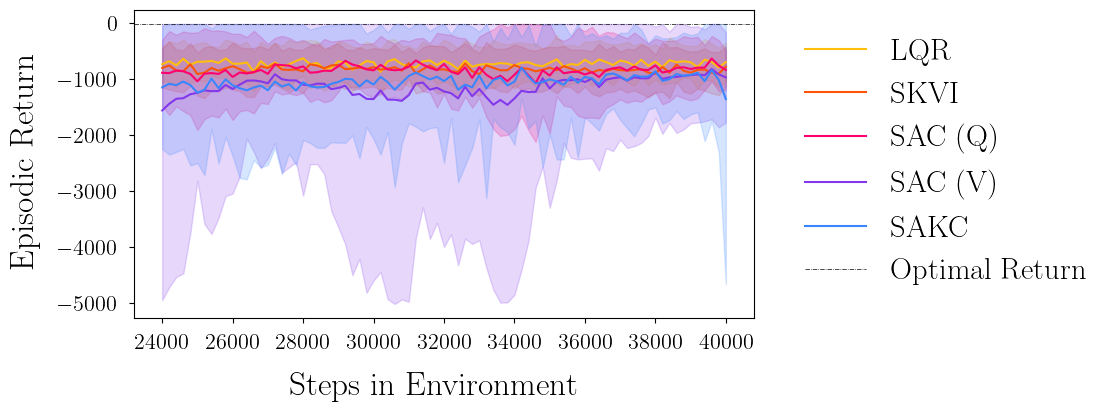

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))

# Linear System
axes.plot(lqr_linear_system_df.index[119:200], ymean_linear_system_lqr[119:200], color=lqr_color, label="LQR")
axes.fill_between(lqr_linear_system_df.index[119:200], ymean_linear_system_lqr[119:200] - ystd_linear_system_lqr[119:200], (ymean_linear_system_lqr[119:200] + ystd_linear_system_lqr[119:200]).clip(upper=linear_system_optimal), color=lqr_color, alpha=.2)
axes.plot(skvi_linear_system_df.index[119:200], ymean_linear_system_skvi[119:200], color=skvi_color, label="SKVI")
axes.fill_between(skvi_linear_system_df.index[119:200], ymean_linear_system_skvi[119:200] - ystd_linear_system_skvi[119:200], (ymean_linear_system_skvi[119:200] + ystd_linear_system_skvi[119:200]).clip(upper=linear_system_optimal), color=skvi_color, alpha=.2)
axes.plot(sac_q_linear_system_df.index[119:200], ymean_linear_system_sac_q[119:200], color=sac_q_color, label="SAC (Q)")
axes.fill_between(sac_q_linear_system_df.index[119:200], ymean_linear_system_sac_q[119:200] - ystd_linear_system_sac_q[119:200], (ymean_linear_system_sac_q[119:200] + ystd_linear_system_sac_q[119:200]).clip(upper=linear_system_optimal), color=sac_q_color, alpha=.2)
axes.plot(sac_v_linear_system_df.index[119:200], ymean_linear_system_sac_v[119:200], color=sac_v_color, label="SAC (V)")
axes.fill_between(sac_v_linear_system_df.index[119:200], ymean_linear_system_sac_v[119:200] - ystd_linear_system_sac_v[119:200], (ymean_linear_system_sac_v[119:200] + ystd_linear_system_sac_v[119:200]).clip(upper=linear_system_optimal), color=sac_v_color, alpha=.2)
axes.plot(sakc_linear_system_df.index[119:200], ymean_linear_system_sakc[119:200], color=sakc_color, label="SAKC")
axes.fill_between(sakc_linear_system_df.index[119:200], ymean_linear_system_sakc[119:200] - ystd_linear_system_sakc[119:200], (ymean_linear_system_sakc[119:200] + ystd_linear_system_sakc[119:200]).clip(upper=linear_system_optimal), color=sakc_color, alpha=.2)
axes.axhline(linear_system_optimal, linestyle='-.', color='black', linewidth=0.5, label="Optimal Return")

fig.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), ncol=1, fontsize=22, frameon=False)

# Major x-, and y-labels
fig.supxlabel('Steps in Environment', fontsize=24, y=-0.1)
fig.supylabel('Episodic Return', fontsize=24, x=-0.03)